**Gradient Boosting Regressor:**

The Gradient Boosting Regressor is a powerful ensemble machine learning algorithm used for predicting continuous values. It builds a strong predictive model by combining many weak learners, typically decision trees, in a sequential manner. Unlike Random Forests, where trees are trained independently, Gradient Boosting trains trees one after another, with each new tree focusing on correcting the errors made by the previous ones. The model optimizes predictions by minimizing a loss function (such as mean squared error) using a technique inspired by gradient descent, which allows it to iteratively improve its performance.

In practice, the algorithm starts with an initial prediction, often the mean of the target variable, and adds small decision trees that predict the residual errors — the differences between the actual and predicted values. Each subsequent tree reduces these residuals, gradually improving the model’s accuracy. Gradient Boosting can capture complex nonlinear relationships and feature interactions, offering high predictive performance. However, it can be computationally intensive and may overfit if hyperparameters like learning rate, tree depth, and number of estimators are not carefully tuned. Despite these challenges, it remains one of the most widely used and effective algorithms for regression tasks.

**Project Setup and Imports:-**This section imports the essential Python libraries for data analysis, visualization, and machine learning. It includes numpy and pandas for data handling, matplotlib and seaborn for plotting, and scikit-learn modules for model training, evaluation, and cross-validation. Warnings are suppressed for cleaner output, and a random seed is set to ensure reproducible results across runs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


**Load California Housing Dataset**

This section loads the California Housing dataset from scikit-learn as a pandas DataFrame. The dataset contains features like median income, house age, average rooms, and location coordinates, with MedHouseVal as the target variable. The first 10 rows are displayed to give a quick overview of the data.

In [3]:
# Import the dataset
from sklearn.datasets import fetch_california_housing

# Load the dataset as a pandas DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame
target = 'MedHouseVal'

# Display the first 10 rows
print("First 10 rows of the California Housing dataset:\n")
print(df.head(10))


First 10 rows of the California Housing dataset:

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3

**Exploratory Data Analysis (EDA)**

**Dataset Overview:-**
1.   df.shape shows the dimensions (rows and columns).
2.   df.info() displays the data types and missing values.m
2.   df.describe() gives summary statistics for each numerical feature.





In [4]:
print(df.shape)
print(df.info())
print(df.describe())

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333

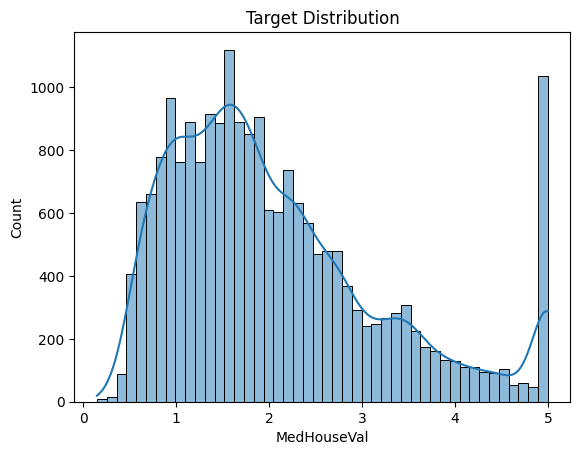

In [5]:
# Target distribution
sns.histplot(df[target], kde=True)
plt.title("Target Distribution")
plt.show()

**Feature Correlation Heatmap**

This section computes the correlation matrix for all numerical features in the dataset and visualizes it as a heatmap. The heatmap shows both the strength and direction of relationships between features, with numeric values annotated in each cell for clarity. Strong positive or negative correlations can help identify redundant features or important relationships to consider during feature engineering and modeling.

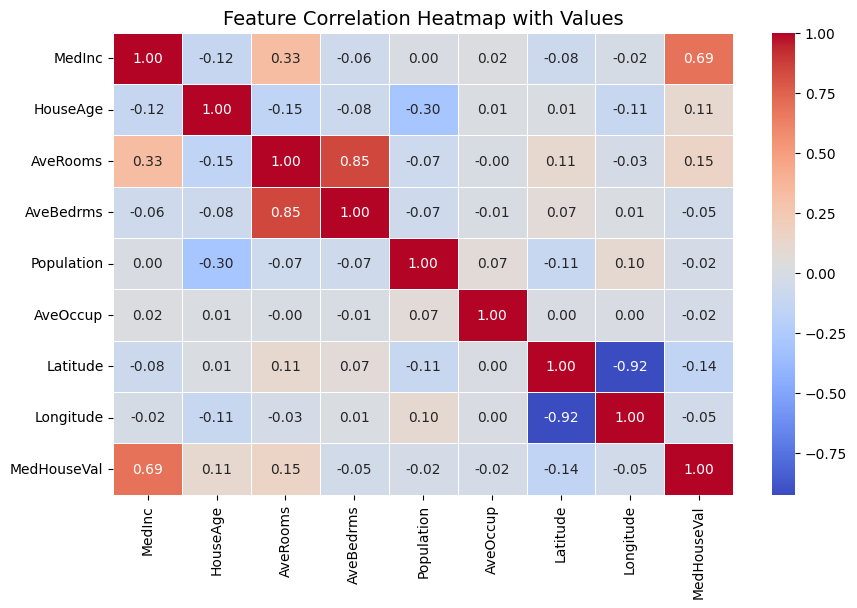

In [8]:
# Compute correlation matrix
corr = df.corr()
# Plot heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap with Values", fontsize=14)
plt.show()

**Data Preprocessing:-**This section prepares the dataset for modeling. First, the features (X) and target (y) are separated. The data is then split into training and testing sets using an 80-20 split to evaluate model performance on unseen data. Finally, the features are standardized using StandardScaler, which scales each feature to have zero mean and unit variance, ensuring that all features contribute equally to the Gradient Boosting model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Baseline Model**

In this section, a baseline Gradient Boosting Regressor is created using default hyperparameters. The model is trained on the scaled training data and then used to make predictions on the test set. This provides a starting point for evaluating performance before performing hyperparameter tuning or further optimization.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=RANDOM_STATE)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)


**Evaluate Model:**-This section evaluates the performance of the trained Gradient Boosting model on the test set using common regression metrics.

1.   Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.
1.   Root Mean Squared Error (RMSE): Measures the standard deviation of prediction errors, giving higher weight to larger errors.
2.   R-squared (R²): Indicates how well the model explains the variance in the target variable.


In [12]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manually take sqrt for RMSE
r2 = r2_score(y_test, y_pred)

# Print formatted results
print(" Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


 Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.3717
Root Mean Squared Error (RMSE): 0.5422
R-squared (R²): 0.7756


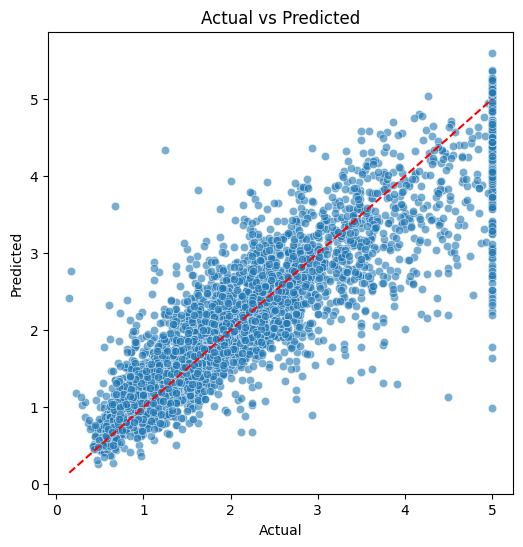

In [13]:
# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


**Hyperparameter Tuning with RandomizedSearchCV**

This section performs hyperparameter tuning for the Gradient Boosting Regressor using RandomizedSearchCV. A reduced parameter grid is defined to speed up execution, including the number of trees (n_estimators), learning rate, tree depth (max_depth), and row subsampling (subsample).

RandomizedSearchCV randomly samples combinations of these parameters across 5 iterations and uses 3-fold cross-validation to evaluate performance using negative RMSE. The best combination of hyperparameters is selected, and the corresponding optimized model is stored in best_model for further evaluation.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define a smaller parameter grid for faster execution
param_grid = {
    'n_estimators': [50, 100, 200],       # fewer trees
    'learning_rate': [0.05, 0.1],         # reasonable learning rates
    'max_depth': [3, 5],                  # shallower trees
    'subsample': [0.8, 1.0]               # row sampling
}

# Set up RandomizedSearchCV with fewer iterations and folds
search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=RANDOM_STATE),
    param_distributions=param_grid,
    n_iter=5,                # reduce iterations
    scoring='neg_root_mean_squared_error',
    cv=3,                    # reduce CV folds
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1
)

# Fit the model
search.fit(X_train_scaled, y_train)

# Get the best parameters and estimator
print("Best params:", search.best_params_)
best_model = search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}


**Re-evaluate the Tuned Model**

This section evaluates the performance of the optimized Gradient Boosting model on the test set. Predictions are made using best_model, and the results are measured with Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

Calculating these metrics allows you to compare the tuned model’s performance against the baseline model, showing whether hyperparameter tuning has improved accuracy and reduced prediction errors. RMSE is computed manually to ensure compatibility with older versions of scikit-learn.

In [18]:
y_pred_best = best_model.predict(X_test_scaled)

print("Tuned Model Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.4f}")
# The 'squared' argument was added in scikit-learn 0.22.
# Calculate RMSE manually for older versions.
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE: {rmse_best:.4f}")
print(f"R²: {r2_score(y_test, y_pred_best):.4f}")

Tuned Model Performance:
MAE: 0.3318
RMSE: 0.4939
R²: 0.8138


**Feature Importance Visualization**

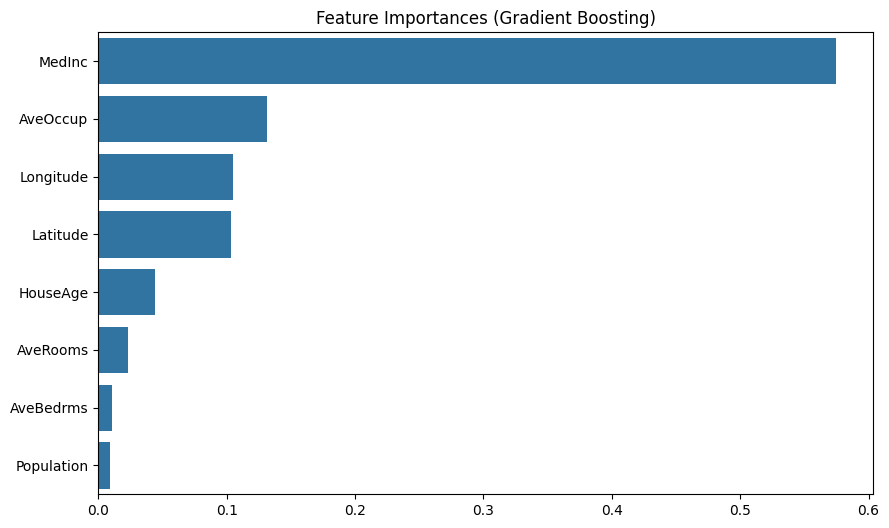

In [19]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Gradient Boosting)")
sns.barplot(x=importances[indices], y=np.array(X.columns)[indices])
plt.show()


**Model Evaluation Curves**

This section visualizes the training and test deviance (mean squared error) of the tuned Gradient Boosting Regressor across all boosting iterations. The training error is tracked using best_model.train_score_, while the test error is calculated at each stage using staged_predict. Plotting these curves allows us to assess the model’s learning behavior and generalization performance. If the training error decreases while the test error rises, it may indicate overfitting, whereas parallel decreases in both errors suggest that the model is generalizing well to unseen data. This visualization provides valuable insight into the model’s performance and helps determine whether further tuning or early stopping might be necessary.

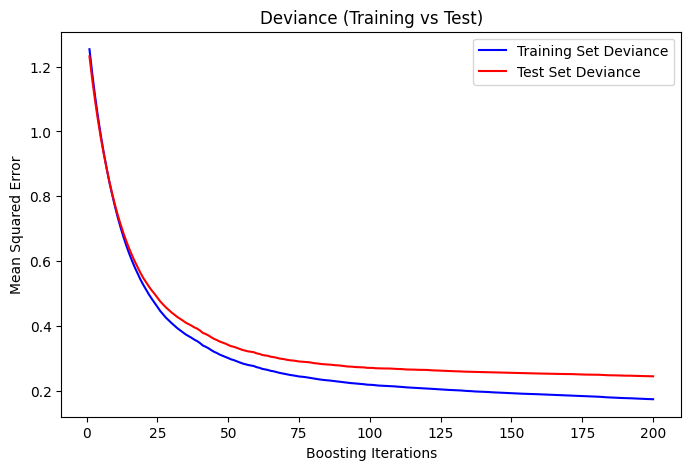

In [20]:
test_score = np.zeros((best_model.n_estimators,), dtype=np.float64)

for i, y_pred_stage in enumerate(best_model.staged_predict(X_test_scaled)):
    test_score[i] = mean_squared_error(y_test, y_pred_stage)

plt.figure(figsize=(8,5))
plt.title("Deviance (Training vs Test)")
plt.plot(np.arange(best_model.n_estimators) + 1, best_model.train_score_, "b-", label="Training Set Deviance")
plt.plot(np.arange(best_model.n_estimators) + 1, test_score, "r-", label="Test Set Deviance")
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Mean Squared Error")
plt.show()


**Save the Model:-** By storing the trained model in 'gradient_boosting_model.joblib', it can be reloaded later without retraining, which is useful for deployment or future predictions. The confirmation message ensures that the model has been saved successfully.

In [21]:
import joblib
joblib.dump(best_model, '/content/gradient_boosting_model.joblib')
print(" Model saved successfully!")


 Model saved successfully!
